**Nama : Annisa Mustika Anggraeni**</br>
**NIM : 211351020**</br>
**Kelas : TIF Pagi A**

# Import Dataset Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annimuss","key":"fd737110693a9113749ff68f2f049db5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 8.71MB/s]


In [ ]:
!mkdir heart-attack-analysis-prediction-dataset
!unzip heart-attack-analysis-prediction-dataset.zip -d heart-attack-analysis-prediction-dataset
!ls heart-attack-analysis-prediction-dataset

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart-attack-analysis-prediction-dataset/heart.csv  
  inflating: heart-attack-analysis-prediction-dataset/o2Saturation.csv  
heart.csv  o2Saturation.csv


# Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

# Data Discovery

In [ ]:
df = pd.read_csv('/content/heart-attack-analysis-prediction-dataset/heart.csv')

In [ ]:
df.sample()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: >

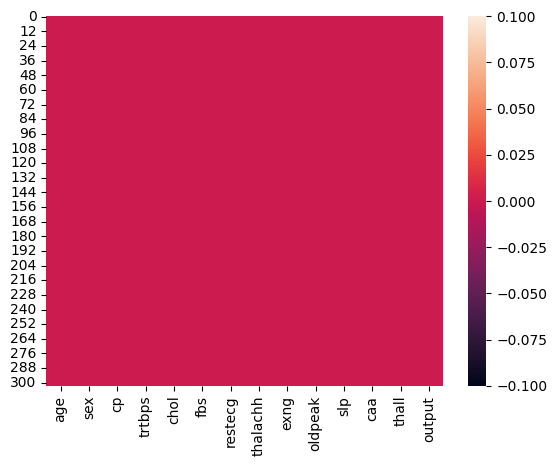

In [ ]:
sns.heatmap(df.isnull())

# EDA (minimal 5)

<Axes: >

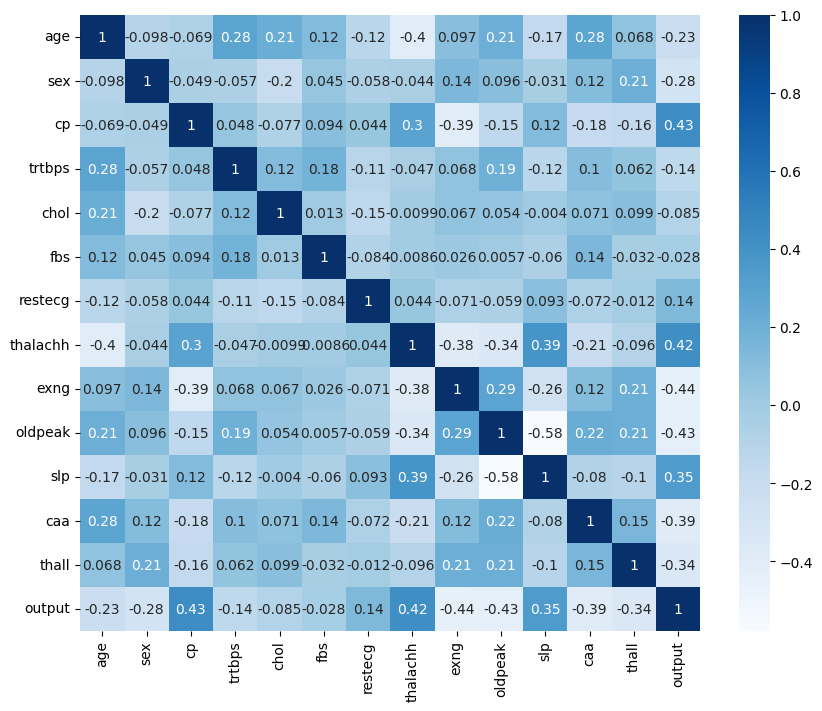

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

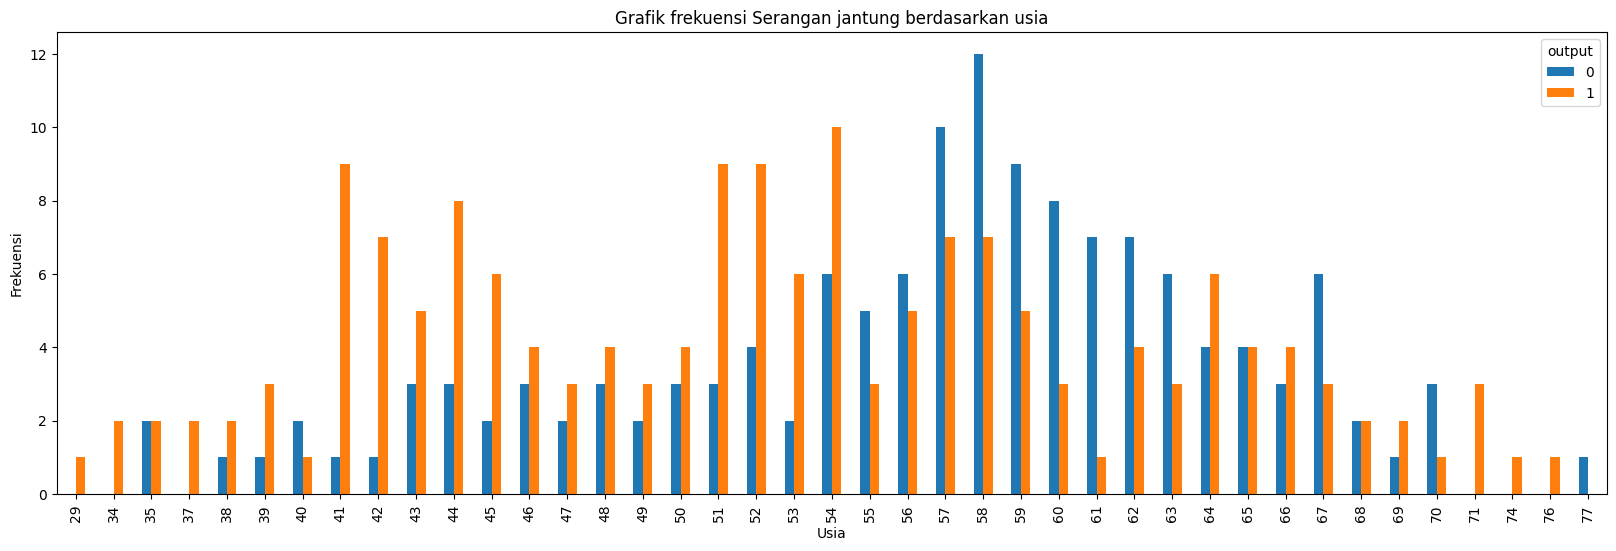

In [ ]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(20,6))
plt.title('Grafik frekuensi Serangan jantung berdasarkan usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.savefig('SeranganJantungDanUmur.png')
plt.show()

<Axes: xlabel='cp', ylabel='Count'>

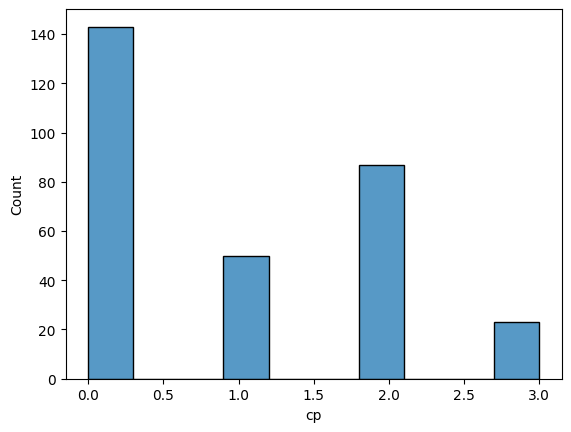

In [ ]:
sns.histplot(df,x = df['cp'],bins = 10,)

Text(0.5, 1.0, 'trtbps')

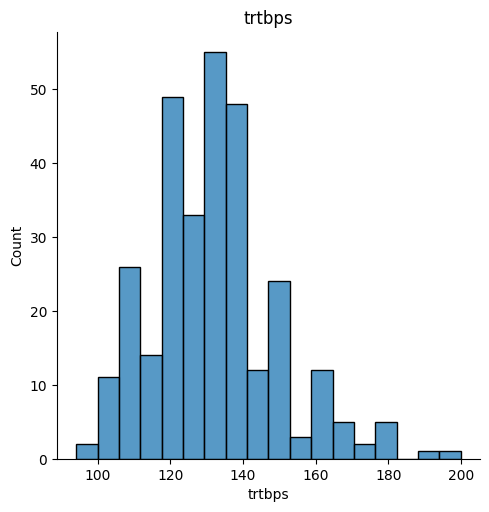

In [ ]:
sns.displot(data=df['trtbps'])
plt.xlabel('trtbps')
plt.ylabel('Count')
plt.title('trtbps')

Text(0.5, 1.0, 'chol')

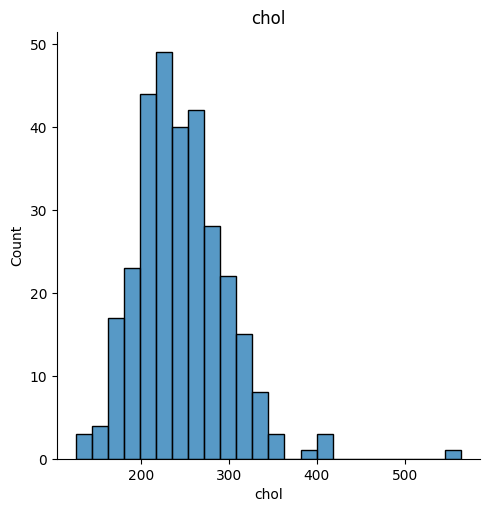

In [ ]:
sns.displot(data=df['chol'])
plt.xlabel('chol')
plt.ylabel('Count')
plt.title('chol')

Text(0.5, 1.0, 'thalachh')

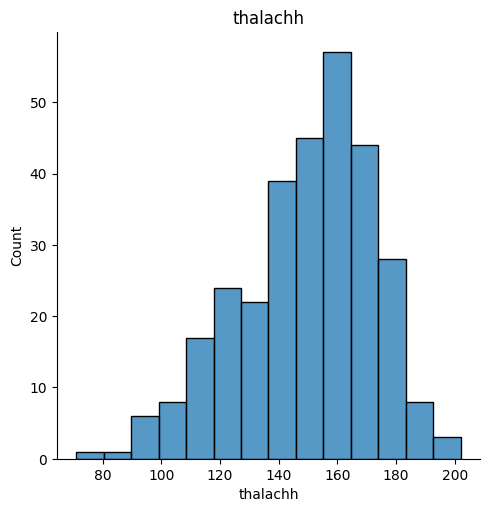

In [ ]:
sns.displot(data=df['thalachh'])
plt.xlabel('thalachh')
plt.ylabel('Count')
plt.title('thalachh')

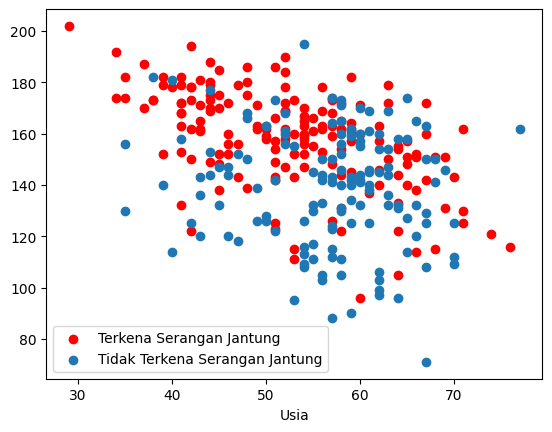

In [ ]:
plt.scatter(x=df.age[df.output==1], y=df.thalachh[(df.output==1)], c="red")
plt.scatter(x=df.age[df.output==0], y=df.thalachh[(df.output==0)])
plt.legend(["Terkena Serangan Jantung", "Tidak Terkena Serangan Jantung"])
plt.xlabel("Usia")
plt.show()

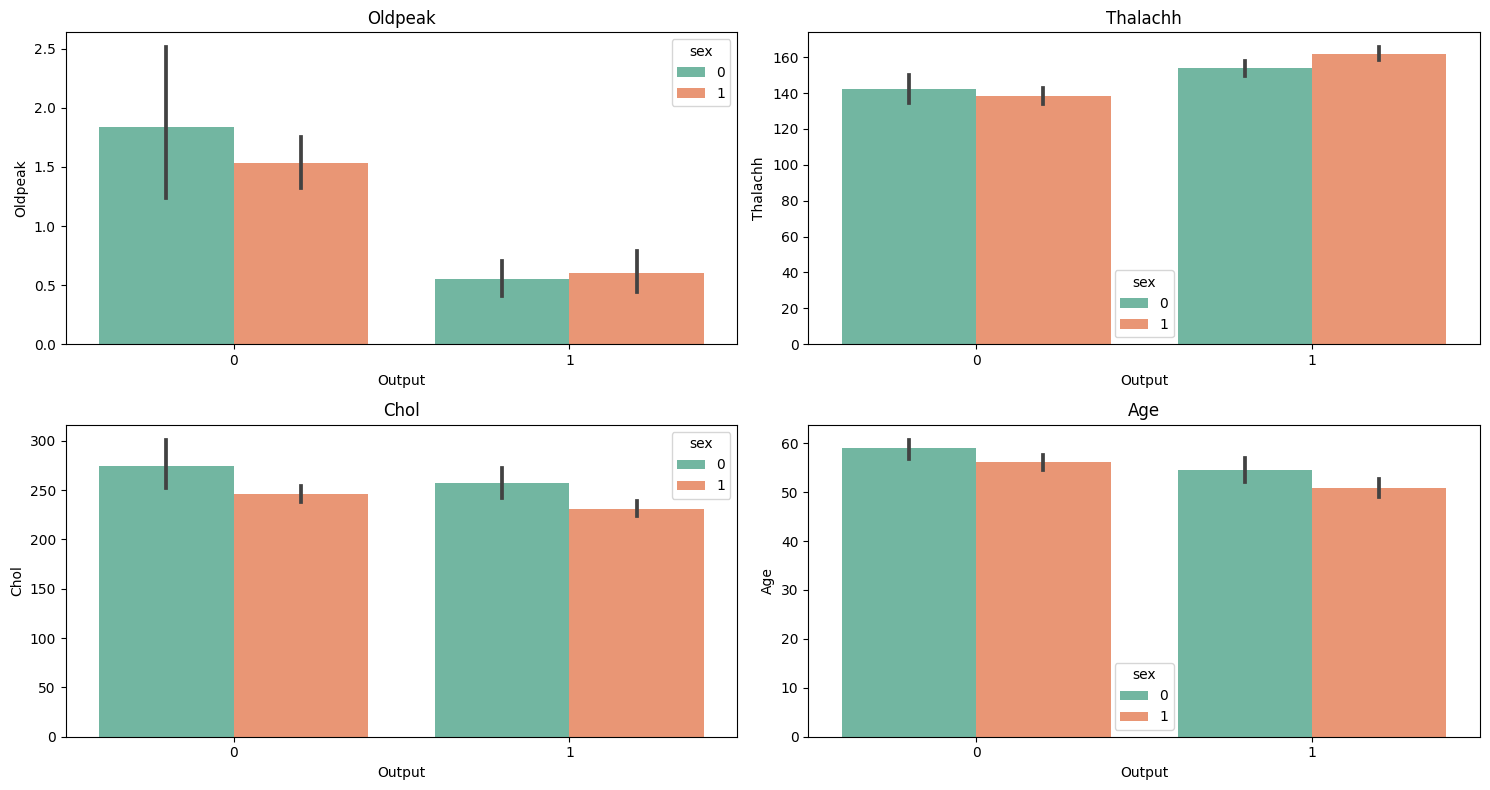

In [ ]:
plt.figure(figsize=(15, 8))

# Subplot 1:
plt.subplot(2, 2, 1)
plt.title("Oldpeak")
sns.barplot(x='output', y='oldpeak', hue='sex', data=df, palette='Set2')
plt.xlabel('Output')
plt.ylabel('Oldpeak')

# Subplot 2:
plt.subplot(2, 2, 2)
plt.title("Thalachh")
sns.barplot(x='output', y='thalachh', hue='sex', data=df, palette='Set2')
plt.xlabel('Output')
plt.ylabel('Thalachh')

# Subplot 3:
plt.subplot(2, 2, 3)
plt.title("Chol")
sns.barplot(x='output', y='chol', hue='sex', data=df, palette='Set2')
plt.xlabel('Output')
plt.ylabel('Chol')

# Subplot 4:
plt.subplot(2, 2, 4)
plt.title("Age")
sns.barplot(x='output', y='age', hue='sex', data=df, palette='Set2')
plt.xlabel('Output')
plt.ylabel('Age')

plt.tight_layout()

plt.show()

# Data Preparation

In [ ]:
ind_col = [col for col in df.columns if col !='output']
dep_col = 'output'

In [ ]:
df[dep_col].value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
x =df[ind_col] #Feature
y = df[dep_col] #Label

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=30)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

# Assuming you have defined x_train, y_train, x_test, and y_test

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi data testing = {dtc_acc} \n")

print(f"Confusion matrix : \n {confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"Classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

Akurasi data training = 0.9116022099447514
Akurasi data testing = 0.7459016393442623 

Confusion matrix : 
 [[40 14]
 [17 51]]

Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        54
           1       0.78      0.75      0.77        68

    accuracy                           0.75       122
   macro avg       0.74      0.75      0.74       122
weighted avg       0.75      0.75      0.75       122



# Simulasi Model

In [ ]:
input_data = (29,	1, 3,	31,	64,	1, 0,	49,	0, 2.3,	0, 0,	1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==1):
  print ('Pasien terkena serangan jantung')
else:
  print ('Pasien tidak terkena serangan jantung')

[1]
Pasien terkena serangan jantung


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi hasil modeling

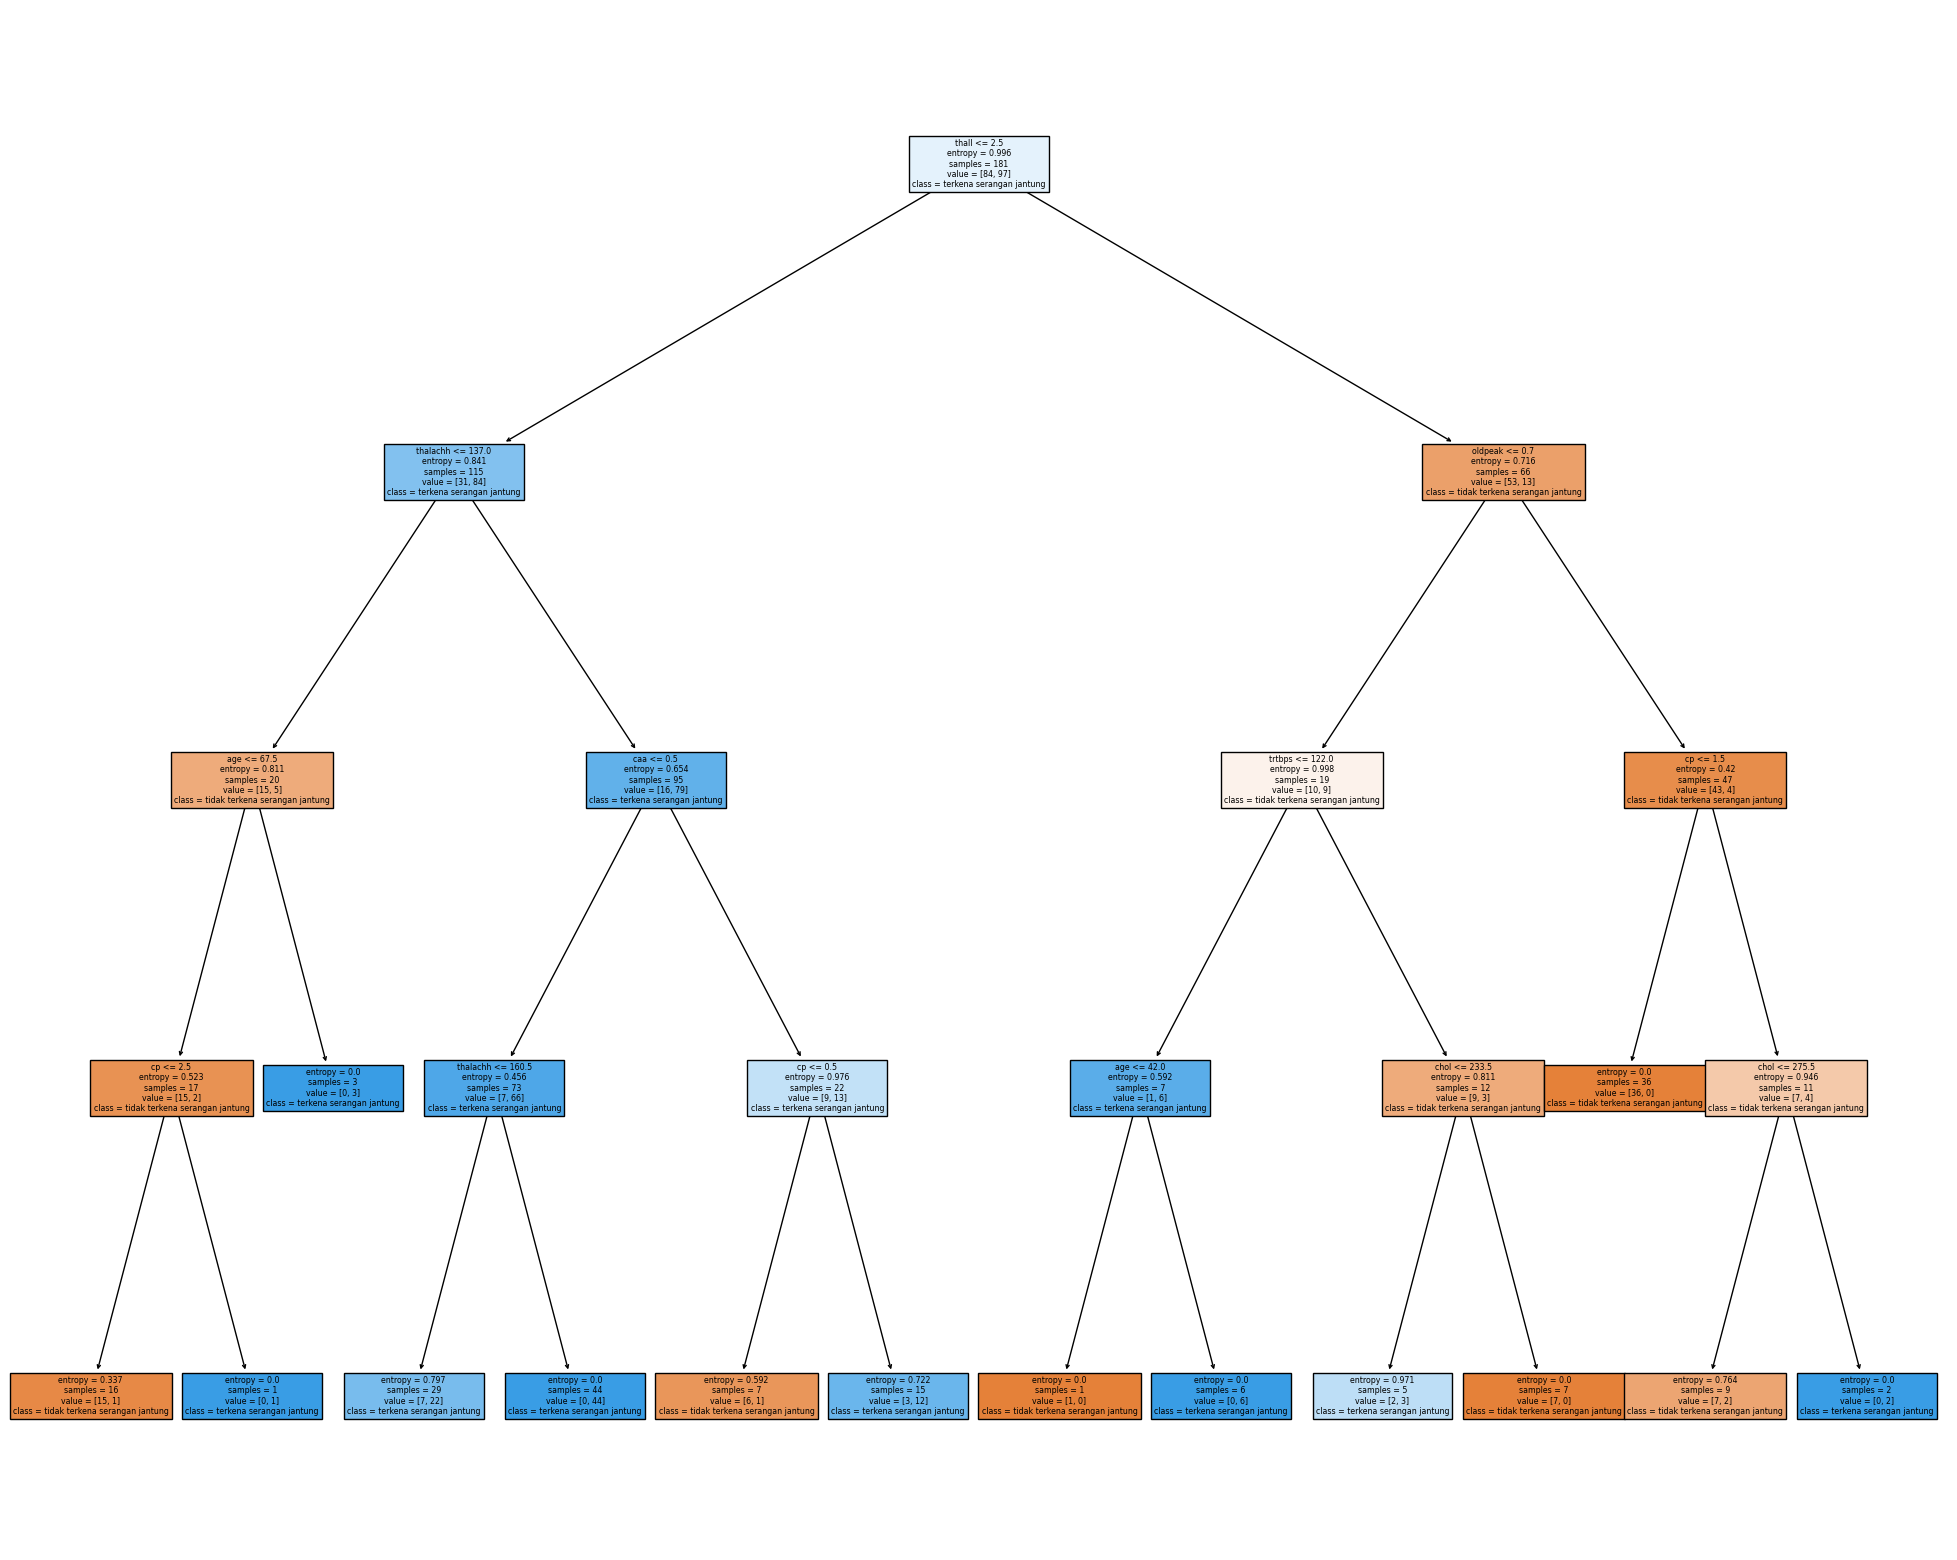

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 20))
tree.plot_tree(
    model,
    feature_names=ind_col,
    class_names=['tidak terkena serangan jantung', 'terkena serangan jantung'],
    filled=True
)
plt.show()

# Simpan model (Pickle)

In [ ]:
import pickle

In [ ]:
filename = 'heart.sav'
pickle.dump(model,open(filename,'wb'))